In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pmdarima

In [ ]:
# импорт библиотек
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima_model import ARMAResults,ARIMAResults
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.stattools import adfuller


from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy import stats
from scipy.stats import normaltest
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

# Датасет milk_production

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Arima_Sarima/milk_production.csv", index_col="Month", parse_dates= True)
df = df.rename(columns={"Monthly milk production (pounds per cow)": 'Pounds milk'})
df.head()

,Unnamed: 0,Pounds milk
Month,,
1962-01-01,0,589
1962-02-01,1,561
1962-03-01,2,640
1962-04-01,3,656
1962-05-01,4,727


In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
# длина данных
len(df)

168

In [ ]:
# удаление пропущенных значений
df.dropna(inplace=True)

In [ ]:
# длина данных после удаления
len(df)

168

In [ ]:
# создаем индекс (уникальность) по полю дата
df.index= pd.to_datetime(df.index)

In [ ]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [ ]:
df.describe()

,Pounds milk
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


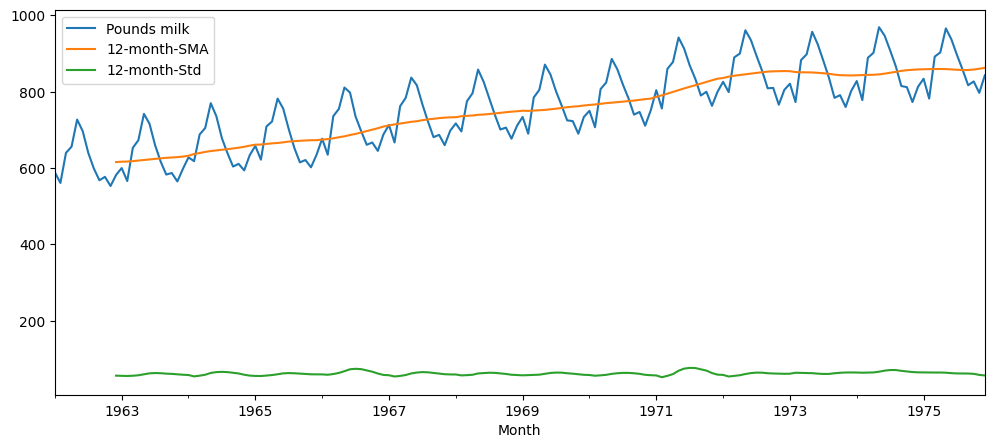

In [ ]:
# дескриптивная аналитики
df['12-month-SMA'] = df['Pounds milk'].rolling(window=12).mean()
df['12-month-Std'] = df['Pounds milk'].rolling(window=12).std()

df[['Pounds milk','12-month-SMA','12-month-Std']].plot(figsize=(12,5));

In [ ]:
df.columns

Index(['Pounds milk', '12-month-SMA', '12-month-Std'], dtype='object')

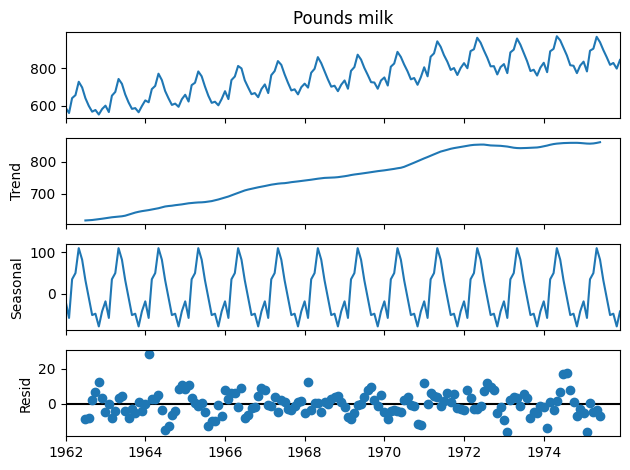

In [ ]:
# сезонная декомпозиция
ssn= seasonal_decompose(df["Pounds milk"], model="add")
ssn.plot();

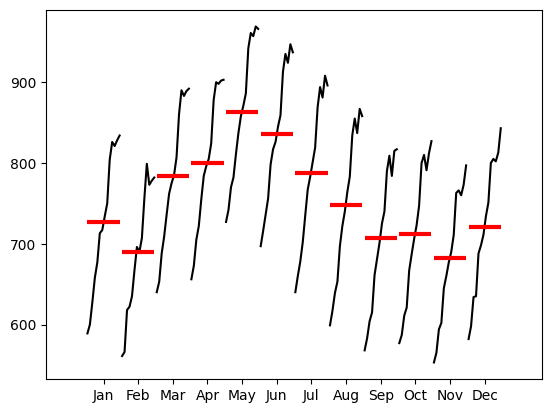

In [ ]:
month_plot(df['Pounds milk']);

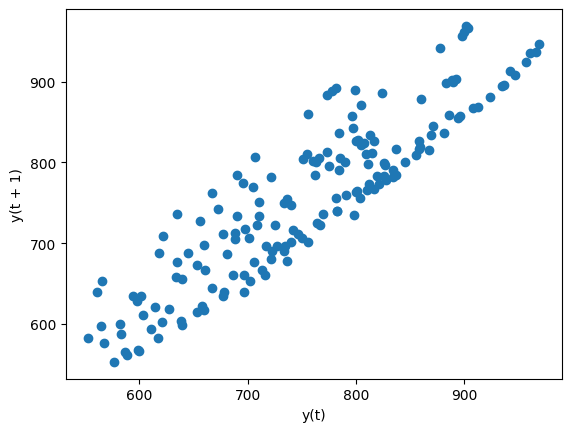

In [ ]:
lag_plot(df['Pounds milk']);

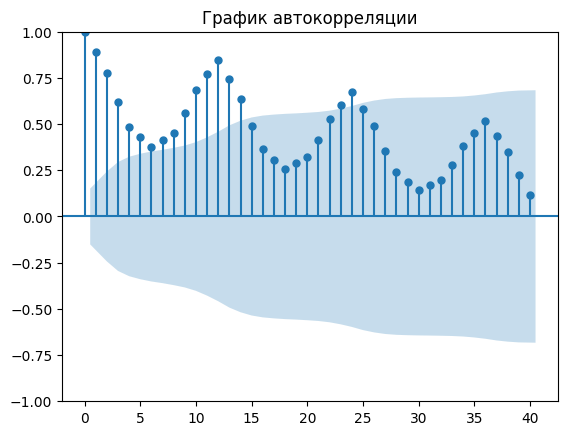

In [ ]:
# ACF
title = 'График автокорреляции'
lags = 40
plot_acf(df["Pounds milk"],title=title,lags=lags);

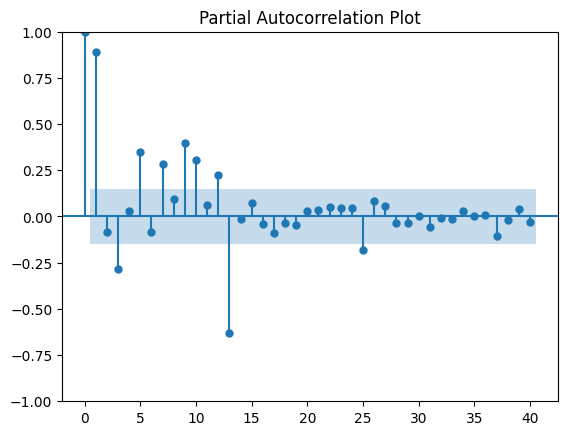

In [ ]:
# PACF
title = 'Partial Autocorrelation Plot'
lags = 40
plot_pacf(df["Pounds milk"],title=title,lags=lags);

In [ ]:
len(df)

168

In [ ]:
# разделим на тестовый и тренировочный набор данных
train= df.iloc[:len(df)-34]
test= df.iloc[len(df)-34:]

In [ ]:
print(len(train))
print(len(test))

134
34


In [ ]:
sxmodel = auto_arima(train["Pounds milk"],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3,
                    m=12,
                    start_P=0,
                    seasonal=True,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=971.951, Time=2.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1004.783, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=869.223, Time=1.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=907.132, Time=2.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1156.184, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=889.422, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=860.706, Time=4.02 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=854.764, Time=2.04 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=854.266, Time=0.61 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=852.266, Time=0.33 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=854.266, Time=1.10 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=2.49 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=849.160, Time=0.46 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=884.968, Time=0.16 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  134
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -419.580
Date:                              Wed, 31 Jul 2024   AIC                            849.160
Time:                                      18:22:29   BIC                            863.180
Sample:                                  01-01-1962   HQIC                           854.855
                                       - 02-01-1973                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9672      1.492      1.988      0.047       0.042       5.892
ar.L1          0.6583      0.100      6.576      0.000       0.462       0.855
ar.L2          0.2090      0.096      2.174      0.030       0.021       0.397
ma.S.L12      -0.6430      0.093     -6.945      0.000      -0.824      -0.462
sigma2        53.5436      6.568      8.152      0.000      40.670      66.417
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                31.21
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                             0.75
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RMSE= 10.270520567579485 

MSE= 105.48359272907322


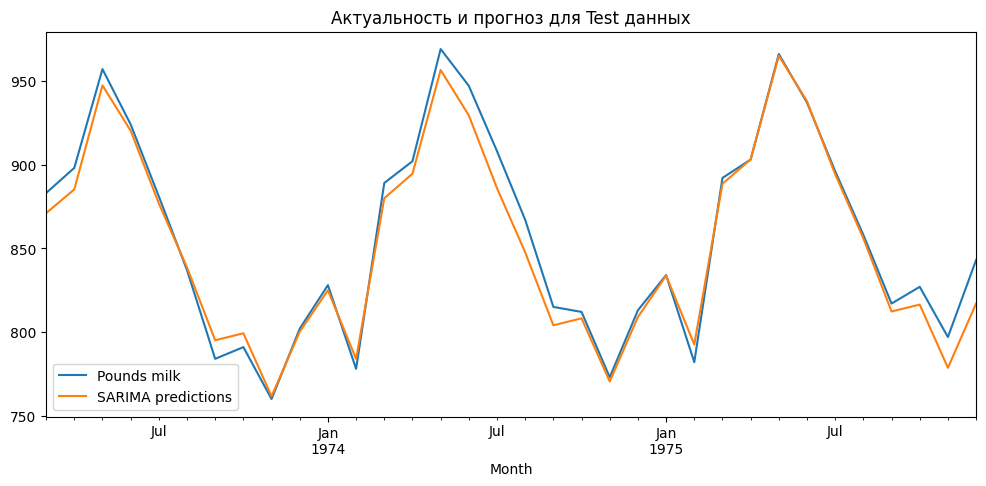

In [ ]:
# обучим модель
sarima_model= SARIMAX(train["Pounds milk"], order= (2,0,0), seasonal_order= (0,1,1,12))
sarima_model_fit= sarima_model.fit()

# сделаем пронозы на Test данных
start= len(train)
end= len(train) + len(test) -1
pred= sarima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("SARIMA predictions")

# построим прогноз
title= "Актуальность и прогноз для Test данных"
test["Pounds milk"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценим модель
mse= mean_squared_error(test["Pounds milk"],pred)
rmse_sarima= rmse(test["Pounds milk"], pred)

print(f"RMSE= {rmse_sarima} \n")
print(f"MSE= {mse}")

# AirPassengers датасет

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Arima_Sarima/AirPassengers.csv", index_col="Month", parse_dates= True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
len(df)

144

In [ ]:
df.dropna(inplace=True)

In [ ]:
len(df)

144

In [ ]:
df.index= pd.to_datetime(df.index)

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


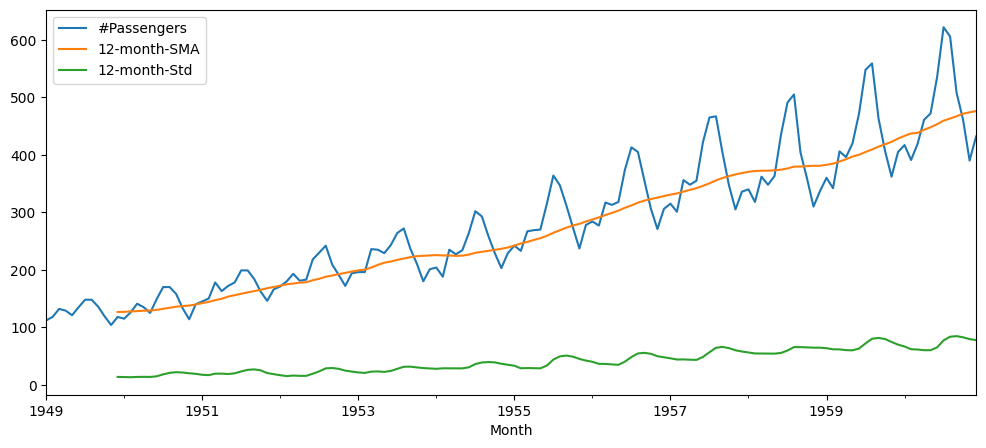

In [ ]:
df['12-month-SMA'] = df['#Passengers'].rolling(window=12).mean()
df['12-month-Std'] = df['#Passengers'].rolling(window=12).std()

df[['#Passengers','12-month-SMA','12-month-Std']].plot(figsize=(12,5));

In [ ]:
df.columns

Index(['#Passengers', '12-month-SMA', '12-month-Std'], dtype='object')

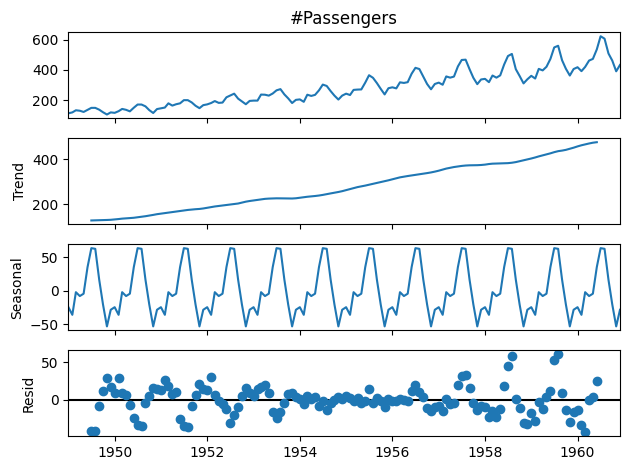

In [ ]:
ssn= seasonal_decompose(df["#Passengers"], model="add")
ssn.plot();

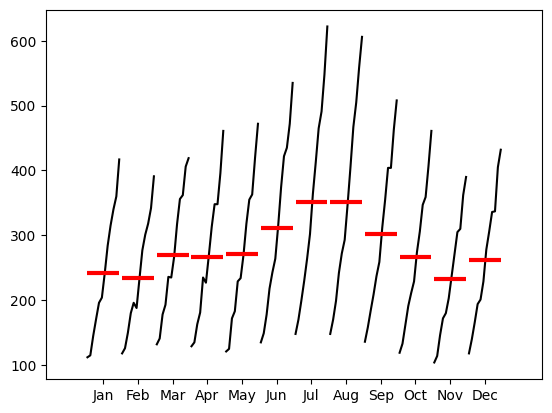

In [ ]:
month_plot(df['#Passengers']);

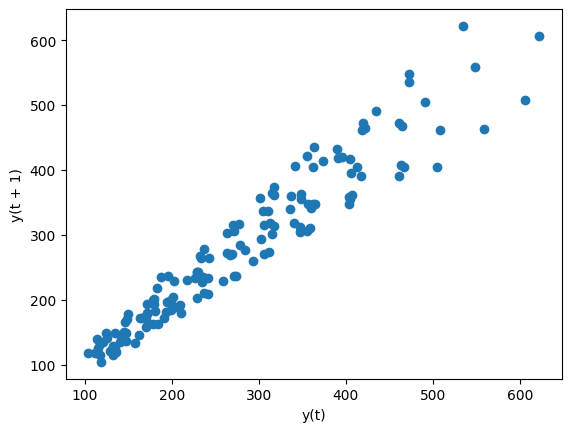

In [ ]:
lag_plot(df['#Passengers']);

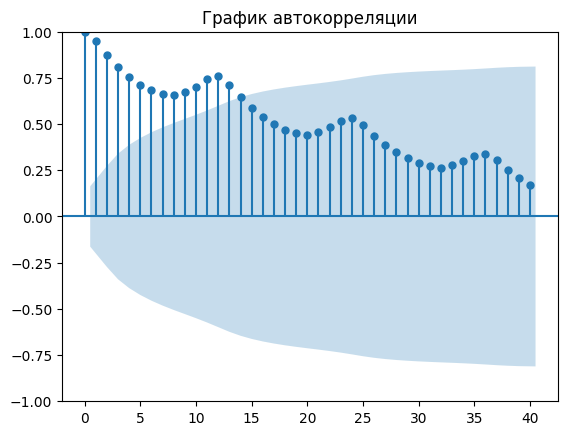

In [ ]:
title = 'График автокорреляции'
lags = 40
plot_acf(df["#Passengers"],title=title,lags=lags);

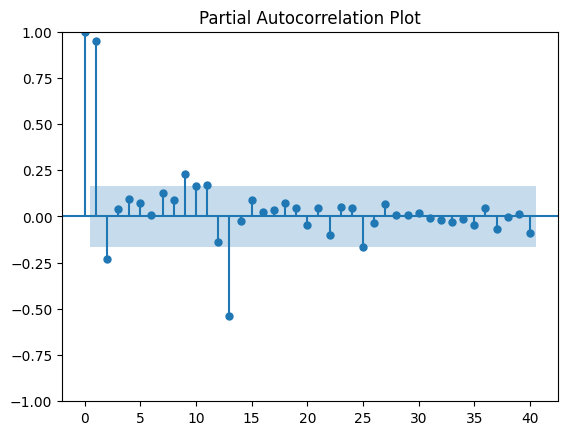

In [ ]:
title = 'Partial Autocorrelation Plot'
lags = 40
plot_pacf(df["#Passengers"],title=title,lags=lags);

In [ ]:
len(df)

144

In [ ]:
train= df.iloc[:len(df)-28]
test= df.iloc[len(df)-28:]

In [ ]:
# SARIMAX модель
sxmodel = auto_arima(train["#Passengers"],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3,
                    m=12,
                    start_P=0,
                    seasonal=True,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=765.377, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=765.723, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=764.756, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=765.328, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=764.138, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=764.944, Time=0.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=766.619, Time=0.71 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=765.206, Time=0.30 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=762.550, Time=0.74 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=765.329, Time=0.78 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=765.510, Time=1.26 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=767.126, Time=1.72 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=764.631, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=766.465, Time=0.12 sec
 ARIMA(1,1,2)(0,1,0)[12]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  116
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -378.275
Date:                             Wed, 31 Jul 2024   AIC                            762.550
Time:                                     18:24:09   BIC                            770.454
Sample:                                 01-01-1949   HQIC                           765.752
                                      - 08-01-1958                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8014      0.081      9.916      0.000       0.643       0.960
ma.L1         -0.9731      0.045    -21.593      0.000      -1.061      -0.885
sigma2        89.8590     12.866      6.984      0.000      64.642     115.076
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):                 1.95
Prob(Q):                              0.32   Prob(JB):                         0.38
Heteroskedasticity (H):               0.87   Skew:                             0.32
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RMSE= 25.608418647793147 

MSE= 655.7911056406398


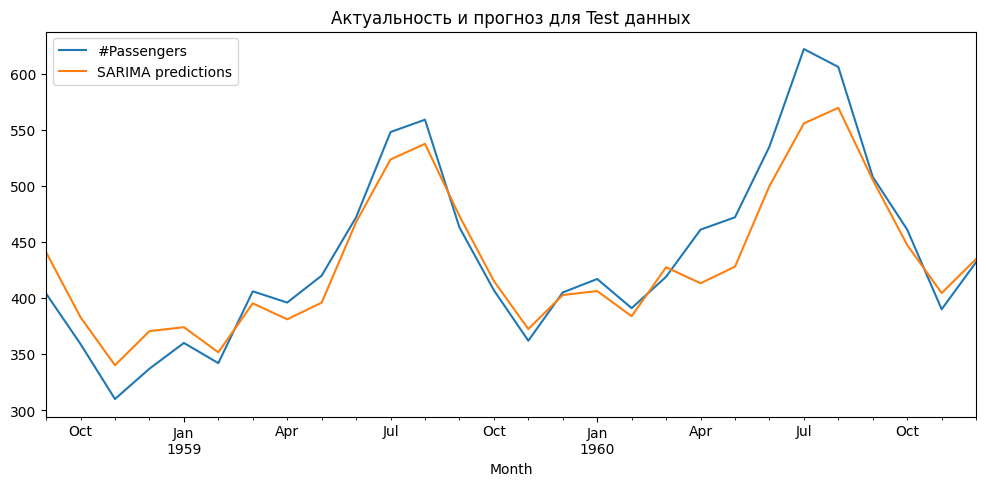

In [ ]:
# обучим модель
sarima_model= SARIMAX(train["#Passengers"], order= (1,1,1), seasonal_order= (0,1,0,12))
sarima_model_fit= sarima_model.fit()

# сделаем пронозы на Test данных
start= len(train)
end= len(train) + len(test) -1
pred= sarima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("SARIMA predictions")

# построим прогноз
title= "Актуальность и прогноз для Test данных"
test["#Passengers"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценим модель
mse= mean_squared_error(test["#Passengers"],pred)
rmse_sarima= rmse(test["#Passengers"], pred)

print(f"RMSE= {rmse_sarima} \n")
print(f"MSE= {mse}")

# Датасет aus_employment

In [ ]:
df_3= pd.read_csv("/content/drive/MyDrive/Arima_Sarima/aus_employment.csv", index_col="date", parse_dates= True)
df_3 = df_3.rename(columns={"date": 'Month'})

In [ ]:
df_3.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


In [ ]:
len(df_3)

159

In [ ]:
df_3.dropna(inplace=True)

In [ ]:
len(df_3)

159

In [ ]:
df_3.index= pd.to_datetime(df_3.index)

In [ ]:
df_3.index

DatetimeIndex(['1978-01-01', '1978-02-01', '1978-03-01', '1978-04-01',
               '1978-05-01', '1978-06-01', '1978-07-01', '1978-08-01',
               '1978-09-01', '1978-10-01',
               ...
               '1990-06-01', '1990-07-01', '1990-08-01', '1990-09-01',
               '1990-10-01', '1990-11-01', '1990-12-01', '1991-01-01',
               '1991-02-01', '1991-03-01'],
              dtype='datetime64[ns]', name='date', length=159, freq=None)

In [ ]:
df_3.describe()

,people_employed
count,159.000000
mean,6787.135849
std,604.616978
min,5971.300000
25%,6312.250000
50%,6528.700000
75%,7216.950000
max,7941.600000


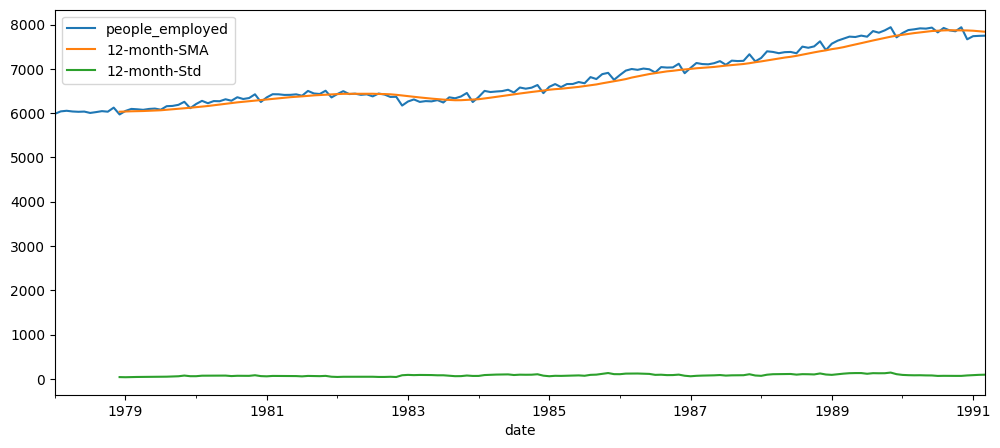

In [ ]:
df_3['12-month-SMA'] = df_3['people_employed'].rolling(window=12).mean()
df_3['12-month-Std'] = df_3['people_employed'].rolling(window=12).std()

df_3[['people_employed','12-month-SMA','12-month-Std']].plot(figsize=(12,5));

In [ ]:
df_3.columns

Index(['people_employed', '12-month-SMA', '12-month-Std'], dtype='object')

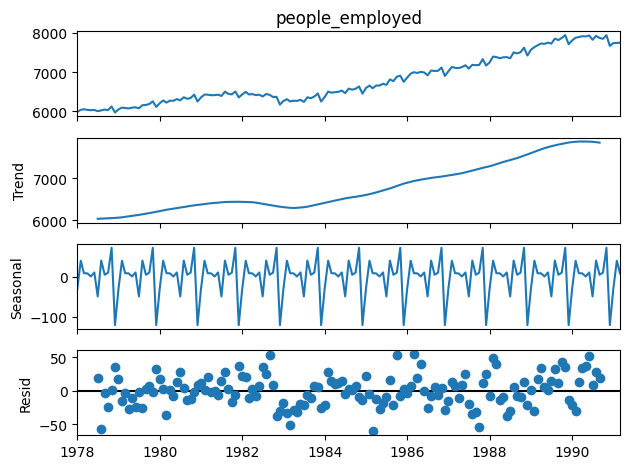

In [ ]:
ssn= seasonal_decompose(df_3["people_employed"], model="add")
ssn.plot();

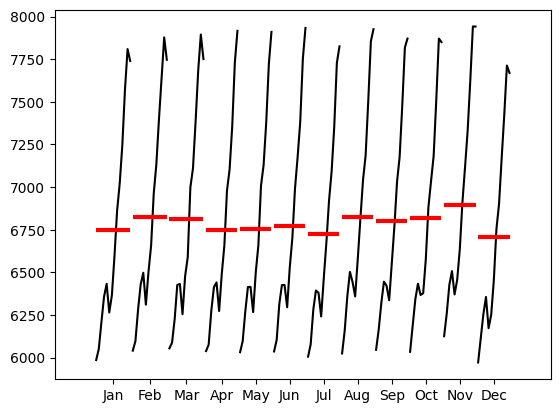

In [ ]:
month_plot(df_3['people_employed']);

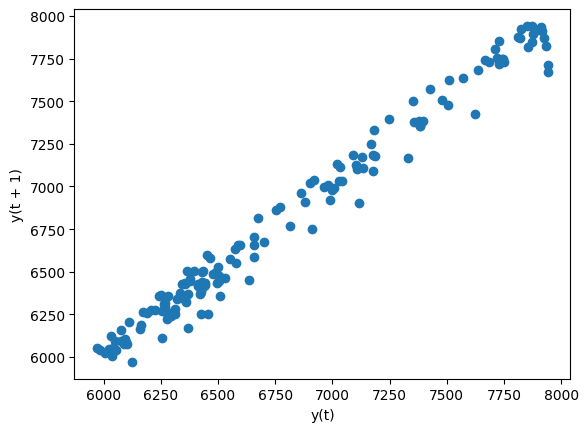

In [ ]:
lag_plot(df_3['people_employed']);

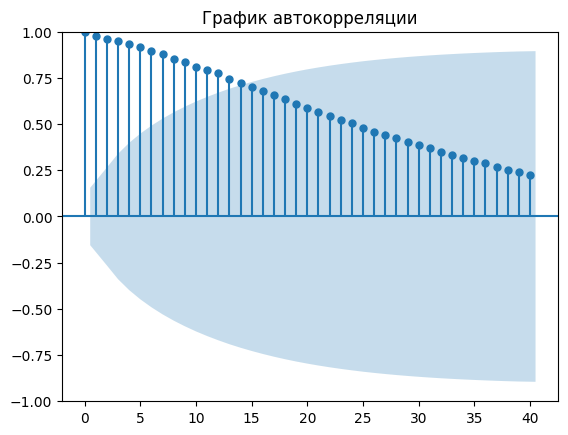

In [ ]:
title = 'График автокорреляции'
lags = 40
plot_acf(df_3["people_employed"],title=title,lags=lags);

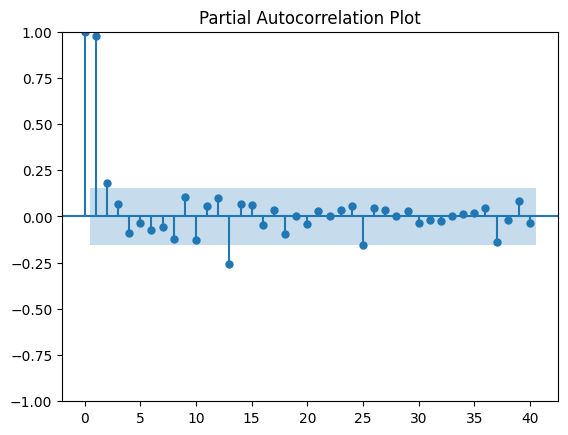

In [ ]:
title = 'Partial Autocorrelation Plot'
lags = 40
plot_pacf(df_3["people_employed"],title=title,lags=lags);

In [ ]:
len(df_3)

159

In [ ]:
train= df_3.iloc[:len(df_3)-32]
test= df_3.iloc[len(df_3)-32:]

In [ ]:
sxmodel = auto_arima(train["people_employed"],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3,
                    m=12,
                    start_P=0,
                    seasonal=True,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1388.109, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1456.247, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1289.196, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1367.882, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1456.726, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1430.408, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1260.717, Time=0.62 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1371.249, Time=0.18 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1262.605, Time=4.87 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1329.577, Time=0.88 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1264.503, Time=1.26 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  127
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -625.590
Date:                              Wed, 31 Jul 2024   AIC                           1259.180
Time:                                      18:25:46   BIC                           1270.525
Sample:                                  01-01-1978   HQIC                          1263.789
                                       - 07-01-1988                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2087      0.088     -2.370      0.018      -0.381      -0.036
ar.S.L12       0.9897      0.010    103.006      0.000       0.971       1.009
ma.S.L12      -0.6908      0.109     -6.310      0.000      -0.905      -0.476
sigma2       977.4792    110.918      8.813      0.000     760.083    1194.875
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.03
Prob(Q):                              0.96   Prob(JB):                         0.13
Heteroskedasticity (H):               2.36   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RMSE= 142.26569463691948 

MSE= 20239.52787052522


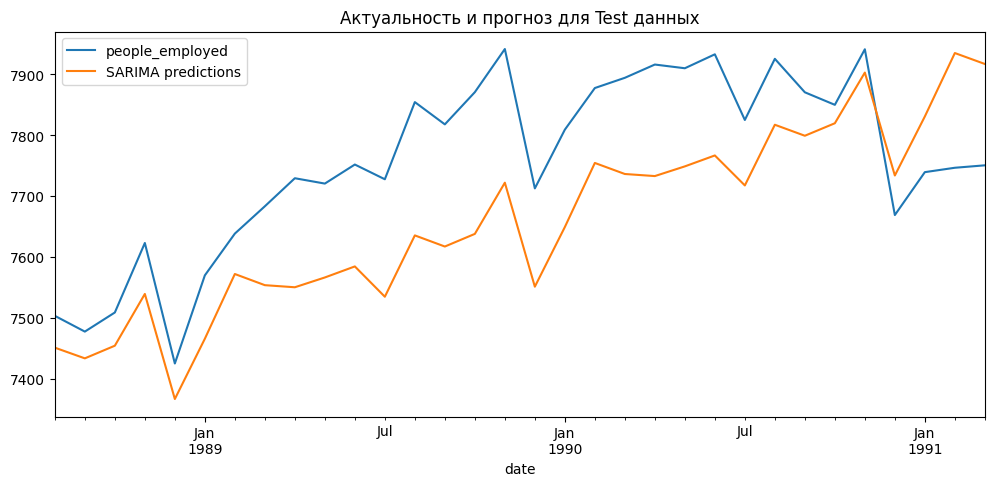

In [ ]:
# обучим модель
sarima_model= SARIMAX(train["people_employed"], order= (1,1,0), seasonal_order= (1,0,1,12))
sarima_model_fit= sarima_model.fit()

# сделаем пронозы на Test данных
start= len(train)
end= len(train) + len(test) -1
pred= sarima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("SARIMA predictions")

# построим прогноз
title= "Актуальность и прогноз для Test данных"
test["people_employed"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценим модель
mse= mean_squared_error(test["people_employed"],pred)
rmse_sarima= rmse(test["people_employed"], pred)

print(f"RMSE= {rmse_sarima} \n")
print(f"MSE= {mse}")